In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy.stats import uniform

In [2]:
df = pd.read_excel('D:\File_Analisa_Python\data_aging.xlsx')

In [52]:
df.describe()
plt.style.use('ggplot')

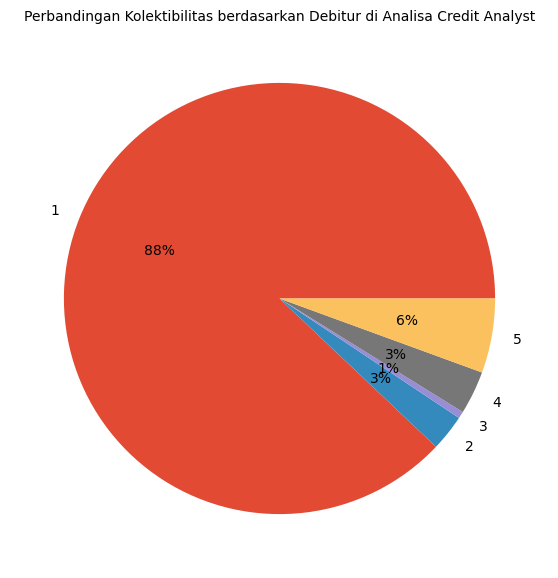

In [53]:
grup_norek = df[['NOREK','BIKOLE', 'TOTAL']]

grup_norek = grup_norek.groupby(['NOREK','BIKOLE']).sum()

grup_norek = grup_norek.reset_index()

pie = grup_norek[['NOREK','BIKOLE']].groupby('BIKOLE').count()

pie.plot(kind='pie', y='NOREK', autopct='%1.0f%%', figsize=(7,7), legend=False)
plt.title('Perbandingan Kolektibilitas berdasarkan Debitur di Analisa Credit Analyst', fontsize=10)
plt.ylabel('')
plt.show()

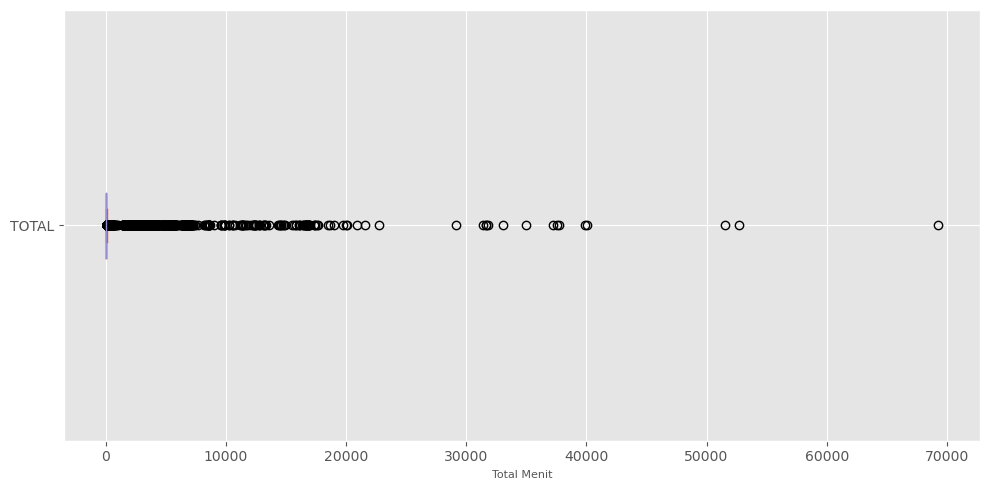

In [61]:
df.plot(kind='box', y='TOTAL', vert=False, figsize=(10,5))
plt.xlabel('Total Menit', fontsize=8)
plt.tight_layout()
plt.show()

403.4003131445433

1168.733992985556

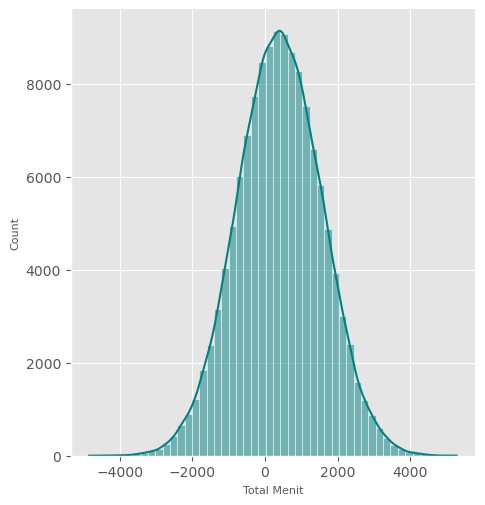

In [77]:
#Distribusi Normal untuk seluruh data PL dan NPL

mean_total = df['TOTAL'].mean()
stdev = df['TOTAL'].std(ddof=0)

display(mean_total)
display(stdev)


data_norm = scipy.stats.norm.rvs(size= len(df['TOTAL']), loc=mean_total, scale=stdev)

sns.displot(data_norm,
            kde=True,
            bins=50,
            color='teal',
            alpha=0.5)
plt.xlabel('Total Menit', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

In [109]:
kondisipl = df['BIKOLE'].isin([1,2])
kondisinpl = df['BIKOLE'].isin([3,4,5])

df[kondisipl]

,NOREK,TR_DESC,TH_SEQ,TR_CODE,TR_DATE,TR_BY,LASTTR_DATE,LASTTR_BY,HARI,MENIT,BIKOLE,HARIMENIT,MIN,JAM,TOTAL,KOL
0,101010160361,Credit Analyst,8,5.1.1,2022-01-11 10:55:06.757,BTN0016116,2022-01-11 08:59:01.183,BTN0016116,0,01:56:00,1,0,56,60,116,NPL
1,101010160361,Credit Analyst,10,5.1.1,2022-01-13 19:15:31.880,BTN0016116,2022-01-13 17:10:46.333,BTN0016116,0,02:05:00,1,0,5,120,125,NPL
2,101010160379,Credit Analyst,14,5.1.1,2022-01-13 07:55:01.240,BTN0012440,2022-01-13 07:45:48.803,BTN0012440,0,00:10:00,1,0,10,0,10,NPL
3,101010160379,Credit Analyst,22,5.1.1,2022-01-14 16:18:50.440,BTN0012440,2022-01-14 15:41:06.313,BTN0012440,0,00:37:00,1,0,37,0,37,NPL
4,101010160387,Credit Analyst,11,5.1.1,2022-01-19 16:16:40.520,BTN0009896,2022-01-19 16:13:20.560,BTN0009896,0,00:03:00,1,0,3,0,3,NPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132841,60301170004443,Credit Analyst,16,5.1.1,2023-02-28 21:33:27.897,BTN0006928,2023-02-28 20:19:06.190,BTN0006928,0,01:14:00,2,0,14,60,74,NPL
132842,60301170004752,Credit Analyst,6,5.1.1,2023-05-19 08:42:26.880,BTN0010152,2023-05-19 07:49:54.937,BTN0010152,0,00:53:00,2,0,53,0,53,NPL
132843,60301170004786,Credit Analyst,9,5.1.1,2023-05-31 22:47:31.583,BTN0006928,2023-05-31 22:03:41.563,BTN0006928,0,00:44:00,2,0,44,0,44,NPL
132844,92101050000016,Credit Analyst,6,5.1.1,2023-05-24 14:00:45.243,BTN0009896,2023-05-24 13:32:39.040,BTN0009896,0,00:28:00,1,0,28,0,28,NPL
